# 212 Warmup: Fix Nick's Code

In [44]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

# I. Wrangle Data

In [45]:
import pandas as pd

df = pd.read_csv(DATA_PATH + 'condos/tribeca.csv',
                 parse_dates=['SALE_DATE'])

# II. Split Data

In [46]:
# target vector (one-dimentional)
target = 'SALE_PRICE'
y = df[target]

# feature matrix (two-dimentional)
X = df[['GROSS_SQUARE_FEET','SALE_DATE']]

In [47]:
import datetime as dt
X['SALE_DATE'] = X['SALE_DATE'].map(dt.datetime.toordinal)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
X.head()

,GROSS_SQUARE_FEET,SALE_DATE
0,1840.0,737062
1,1759.0,737066
2,1190.0,737068
3,1088.0,737069
4,873.0,737070


# III. Establish a Baseline

In [49]:
from sklearn.metrics import mean_absolute_error
y_pred = [y.mean()] * len(y)

print('Baseline MAE:', mean_absolute_error(y, y_pred))

Baseline MAE: 2783380.1977777784


# IV. Build Model

In [50]:
# STEP 1: Import your predictor class
from sklearn.linear_model import LinearRegression

# STEP 2: Instantiate your predictor
model = LinearRegression()

# STEP 3: Fit your predictor on the (training) data
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# V. Check Our Metrics

In [51]:
print('Training MAE:', mean_absolute_error(y, y_pred))

Training MAE: 2783380.1977777784


# VI. Communicate Results

In [52]:
f'SALE_PRICE = {model.intercept_} + {model.coef_[0]} * SQFT'

'SALE_PRICE = 1711812461.6424775 + 3058.9139425896287 * SQFT'

ValueError: ignored

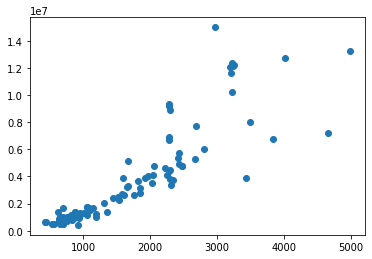

In [58]:
import matplotlib.pyplot as plt

plt.scatter(df['GROSS_SQUARE_FEET'], df['SALE_PRICE'])
plt.plot(df['GROSS_SQUARE_FEET'], 
         model.predict(df[['GROSS_SQUARE_FEET']]), 
         label='Linear Regression Model', 
         color='red')
plt.xlabel('SQ FT')
plt.ylabel('Price [$10 million]')
plt.legend();

In [38]:
import matplotlib.pyplot as plt

plt.scatter(df['GROSS_SQUARE_FEET'], model.predict(df['GROSS_SQUARE_FEET']))
plt.plot(df['GROSS_SQUARE_FEET'], 
         model.predict(X), 
         label='Linear Regression Model', 
         color='red')
plt.xlabel('SQ FT')
plt.ylabel('Price [$10 million]')
plt.legend();

ValueError: ignored